In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.utils import to_categorical
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import plot_model

import pickle

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# prepare gray scale data
data_gray_file = open('./archiv/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archiv/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)

In [3]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = to_categorical(data_color['y_train'], num_classes=43)
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [21]:
# def plotConfusionMatrix(y_true, y_pred):
    # y_pred1 = np.argmax(y_pred, axis=1)
    #y_true1=np.argmax(y_true, axis=1)

    #cm = confusion_matrix(y_true=y_true1, y_pred=y_pred1)

    #plt.figure(figsize=(14,12))
    #sns.heatmap(cm, cmap=mpl.cm.Blues)

# 3 Layer MLP
Daten reshapen damit sie als Vektor statt als 4D Array vorliegen

In [4]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


Epoch 1/20
680/680 [==============================] - 5s 5ms/step - loss: 0.0881 - accuracy: 0.4622 - val_loss: 0.0567 - val_accuracy: 0.6251
Epoch 2/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0444 - accuracy: 0.7723 - val_loss: 0.0411 - val_accuracy: 0.7610
Epoch 3/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0333 - accuracy: 0.8393 - val_loss: 0.0344 - val_accuracy: 0.8017
Epoch 4/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0280 - accuracy: 0.8690 - val_loss: 0.0327 - val_accuracy: 0.8147
Epoch 5/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0246 - accuracy: 0.8855 - val_loss: 0.0305 - val_accuracy: 0.8320
Epoch 6/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0223 - accuracy: 0.8968 - val_loss: 0.0304 - val_accuracy: 0.8369
Epoch 7/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0206 - accuracy: 0.9058 - val_loss: 0.0288 - val_accuracy: 0.8420
Epoch 

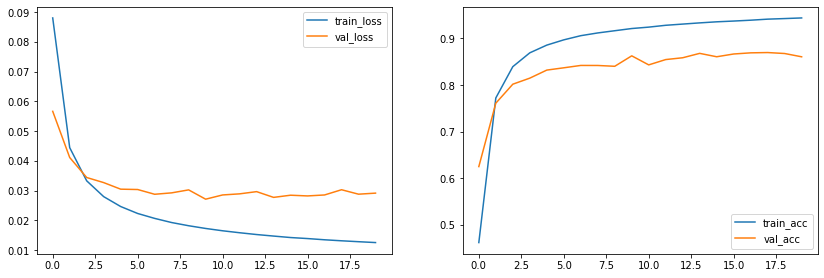

In [58]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=20, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Nun ändern wir Dense auf 800 und die Epochs erhöhen wir auf 120

Epoch 1/120
680/680 [==============================] - 12s 16ms/step - loss: 0.0650 - accuracy: 0.5978 - val_loss: 0.0403 - val_accuracy: 0.7629
Epoch 2/120
680/680 [==============================] - 10s 15ms/step - loss: 0.0292 - accuracy: 0.8487 - val_loss: 0.0326 - val_accuracy: 0.7975
Epoch 3/120
680/680 [==============================] - 10s 15ms/step - loss: 0.0202 - accuracy: 0.8995 - val_loss: 0.0300 - val_accuracy: 0.8157
Epoch 4/120
680/680 [==============================] - 10s 15ms/step - loss: 0.0154 - accuracy: 0.9264 - val_loss: 0.0305 - val_accuracy: 0.8495
Epoch 5/120
680/680 [==============================] - 10s 15ms/step - loss: 0.0124 - accuracy: 0.9440 - val_loss: 0.0286 - val_accuracy: 0.8523
Epoch 6/120
680/680 [==============================] - 10s 15ms/step - loss: 0.0103 - accuracy: 0.9543 - val_loss: 0.0319 - val_accuracy: 0.8508
Epoch 7/120
680/680 [==============================] - 11s 15ms/step - loss: 0.0088 - accuracy: 0.9626 - val_loss: 0.0298 - val_ac

680/680 [==============================] - 11s 16ms/step - loss: 8.7499e-04 - accuracy: 0.9993 - val_loss: 0.0955 - val_accuracy: 0.9065
Epoch 113/120
680/680 [==============================] - 12s 18ms/step - loss: 9.5690e-04 - accuracy: 0.9992 - val_loss: 0.1057 - val_accuracy: 0.9110
Epoch 114/120
680/680 [==============================] - 11s 15ms/step - loss: 8.5704e-04 - accuracy: 0.9994 - val_loss: 0.1342 - val_accuracy: 0.8823
Epoch 115/120
680/680 [==============================] - 12s 17ms/step - loss: 9.3322e-04 - accuracy: 0.9993 - val_loss: 0.1116 - val_accuracy: 0.9055
Epoch 116/120
680/680 [==============================] - 10s 15ms/step - loss: 8.8775e-04 - accuracy: 0.9993 - val_loss: 0.1081 - val_accuracy: 0.8996
Epoch 117/120
680/680 [==============================] - 10s 15ms/step - loss: 8.8826e-04 - accuracy: 0.9994 - val_loss: 0.1177 - val_accuracy: 0.8982
Epoch 118/120
680/680 [==============================] - 10s 15ms/step - loss: 9.6711e-04 - accuracy: 0.9994

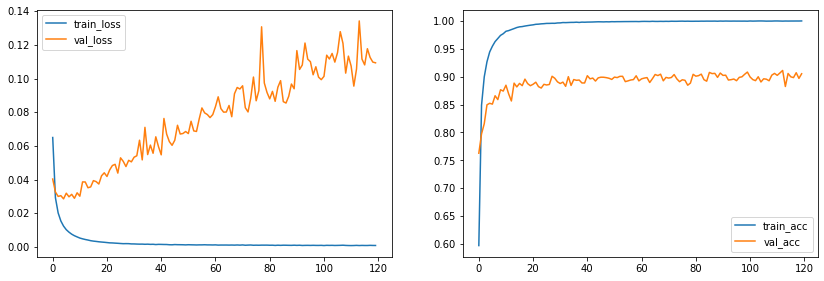

In [8]:
# New Dense 800, epochs 120

# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(800, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Dense 400 Epochs 120

Epoch 1/120
680/680 [==============================] - 7s 9ms/step - loss: 0.0692 - accuracy: 0.5800 - val_loss: 0.0468 - val_accuracy: 0.6845
Epoch 2/120
680/680 [==============================] - 6s 9ms/step - loss: 0.0320 - accuracy: 0.8427 - val_loss: 0.0332 - val_accuracy: 0.8088
Epoch 3/120
680/680 [==============================] - 6s 9ms/step - loss: 0.0229 - accuracy: 0.8901 - val_loss: 0.0292 - val_accuracy: 0.8283
Epoch 4/120
680/680 [==============================] - 6s 9ms/step - loss: 0.0180 - accuracy: 0.9149 - val_loss: 0.0293 - val_accuracy: 0.8371
Epoch 5/120
680/680 [==============================] - 7s 10ms/step - loss: 0.0148 - accuracy: 0.9306 - val_loss: 0.0257 - val_accuracy: 0.8485
Epoch 6/120
680/680 [==============================] - 7s 10ms/step - loss: 0.0125 - accuracy: 0.9426 - val_loss: 0.0280 - val_accuracy: 0.8480
Epoch 7/120
680/680 [==============================] - 13s 19ms/step - loss: 0.0109 - accuracy: 0.9515 - val_loss: 0.0259 - val_accuracy: 0.

680/680 [==============================] - 7s 10ms/step - loss: 8.1766e-04 - accuracy: 0.9992 - val_loss: 0.0904 - val_accuracy: 0.9021
Epoch 113/120
680/680 [==============================] - 7s 10ms/step - loss: 8.0483e-04 - accuracy: 0.9992 - val_loss: 0.0946 - val_accuracy: 0.8914
Epoch 114/120
680/680 [==============================] - 7s 10ms/step - loss: 7.3425e-04 - accuracy: 0.9994 - val_loss: 0.0832 - val_accuracy: 0.9044
Epoch 115/120
680/680 [==============================] - 7s 10ms/step - loss: 7.7493e-04 - accuracy: 0.9994 - val_loss: 0.0876 - val_accuracy: 0.8979
Epoch 116/120
680/680 [==============================] - 7s 10ms/step - loss: 8.2668e-04 - accuracy: 0.9991 - val_loss: 0.0927 - val_accuracy: 0.9005
Epoch 117/120
680/680 [==============================] - 7s 10ms/step - loss: 7.7654e-04 - accuracy: 0.9994 - val_loss: 0.1017 - val_accuracy: 0.8930
Epoch 118/120
680/680 [==============================] - 7s 10ms/step - loss: 7.5403e-04 - accuracy: 0.9994 - val_

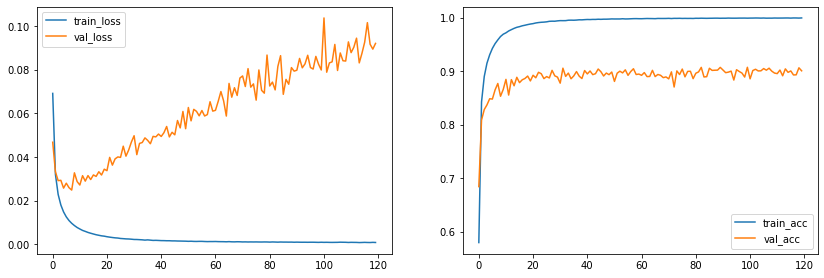

In [11]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(400, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Nun behalten wir epochs und Batchsize bei und schauen uns veränderungen der Grafik an wenn wir die Density ändern

Density auf 200 senken

Epoch 1/120
680/680 [==============================] - 6s 8ms/step - loss: 0.0742 - accuracy: 0.5475 - val_loss: 0.0484 - val_accuracy: 0.6819
Epoch 2/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0354 - accuracy: 0.8252 - val_loss: 0.0352 - val_accuracy: 0.7739
Epoch 3/120
680/680 [==============================] - 5s 7ms/step - loss: 0.0260 - accuracy: 0.8763 - val_loss: 0.0324 - val_accuracy: 0.8053
Epoch 4/120
680/680 [==============================] - 5s 7ms/step - loss: 0.0211 - accuracy: 0.9022 - val_loss: 0.0311 - val_accuracy: 0.8147
Epoch 5/120
680/680 [==============================] - 4s 7ms/step - loss: 0.0178 - accuracy: 0.9184 - val_loss: 0.0274 - val_accuracy: 0.8494
Epoch 6/120
680/680 [==============================] - 4s 7ms/step - loss: 0.0155 - accuracy: 0.9300 - val_loss: 0.0276 - val_accuracy: 0.8554
Epoch 7/120
680/680 [==============================] - 5s 7ms/step - loss: 0.0137 - accuracy: 0.9396 - val_loss: 0.0298 - val_accuracy: 0.8569

Epoch 58/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0020 - accuracy: 0.9956 - val_loss: 0.0583 - val_accuracy: 0.8880
Epoch 59/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0019 - accuracy: 0.9957 - val_loss: 0.0520 - val_accuracy: 0.8935
Epoch 60/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0019 - accuracy: 0.9955 - val_loss: 0.0538 - val_accuracy: 0.8904
Epoch 61/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0019 - accuracy: 0.9959 - val_loss: 0.0549 - val_accuracy: 0.8919
Epoch 62/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0018 - accuracy: 0.9959 - val_loss: 0.0538 - val_accuracy: 0.8940
Epoch 63/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0018 - accuracy: 0.9958 - val_loss: 0.0523 - val_accuracy: 0.8952
Epoch 64/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0018 - accuracy: 0.9961 - val_loss: 0.0562 - val_accuracy:

Epoch 115/120
680/680 [==============================] - 4s 7ms/step - loss: 0.0011 - accuracy: 0.9982 - val_loss: 0.0875 - val_accuracy: 0.8899
Epoch 116/120
680/680 [==============================] - 4s 7ms/step - loss: 0.0011 - accuracy: 0.9985 - val_loss: 0.0814 - val_accuracy: 0.9007
Epoch 117/120
680/680 [==============================] - 5s 7ms/step - loss: 0.0012 - accuracy: 0.9984 - val_loss: 0.0753 - val_accuracy: 0.8961
Epoch 118/120
680/680 [==============================] - 5s 7ms/step - loss: 0.0011 - accuracy: 0.9985 - val_loss: 0.0875 - val_accuracy: 0.8886
Epoch 119/120
680/680 [==============================] - 5s 7ms/step - loss: 0.0011 - accuracy: 0.9985 - val_loss: 0.0761 - val_accuracy: 0.8971
Epoch 120/120
680/680 [==============================] - 4s 7ms/step - loss: 0.0010 - accuracy: 0.9987 - val_loss: 0.0807 - val_accuracy: 0.8997


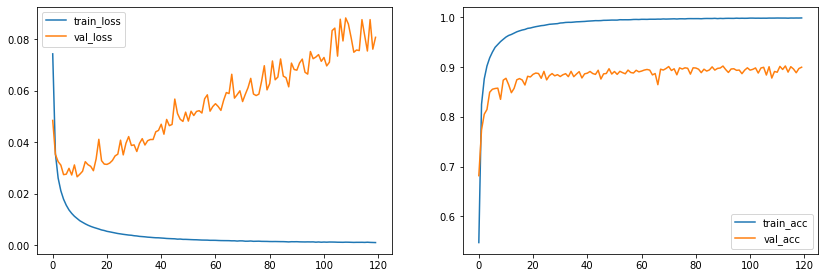

In [5]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(200, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Vergleich Density auf 100

Epoch 1/120
680/680 [==============================] - 5s 6ms/step - loss: 0.0835 - accuracy: 0.4905 - val_loss: 0.0536 - val_accuracy: 0.6405
Epoch 2/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0415 - accuracy: 0.7914 - val_loss: 0.0393 - val_accuracy: 0.7514
Epoch 3/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0312 - accuracy: 0.8521 - val_loss: 0.0355 - val_accuracy: 0.7857
Epoch 4/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0260 - accuracy: 0.8803 - val_loss: 0.0318 - val_accuracy: 0.8102
Epoch 5/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0227 - accuracy: 0.8960 - val_loss: 0.0312 - val_accuracy: 0.8192
Epoch 6/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0203 - accuracy: 0.9077 - val_loss: 0.0288 - val_accuracy: 0.8394
Epoch 7/120
680/680 [==============================] - 4s 6ms/step - loss: 0.0184 - accuracy: 0.9164 - val_loss: 0.0279 - val_accuracy: 0.8457

Epoch 58/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0053 - accuracy: 0.9812 - val_loss: 0.0407 - val_accuracy: 0.8810
Epoch 59/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0053 - accuracy: 0.9819 - val_loss: 0.0387 - val_accuracy: 0.8847
Epoch 60/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0052 - accuracy: 0.9821 - val_loss: 0.0415 - val_accuracy: 0.8789
Epoch 61/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0052 - accuracy: 0.9822 - val_loss: 0.0438 - val_accuracy: 0.8822
Epoch 62/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0051 - accuracy: 0.9826 - val_loss: 0.0424 - val_accuracy: 0.8842
Epoch 63/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0050 - accuracy: 0.9828 - val_loss: 0.0401 - val_accuracy: 0.8849
Epoch 64/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0050 - accuracy: 0.9831 - val_loss: 0.0403 - val_accuracy:

Epoch 115/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0035 - accuracy: 0.9896 - val_loss: 0.0560 - val_accuracy: 0.8772
Epoch 116/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0035 - accuracy: 0.9898 - val_loss: 0.0578 - val_accuracy: 0.8867
Epoch 117/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0035 - accuracy: 0.9902 - val_loss: 0.0572 - val_accuracy: 0.8770
Epoch 118/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0035 - accuracy: 0.9900 - val_loss: 0.0629 - val_accuracy: 0.8751
Epoch 119/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0035 - accuracy: 0.9903 - val_loss: 0.0611 - val_accuracy: 0.8823
Epoch 120/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0035 - accuracy: 0.9900 - val_loss: 0.0622 - val_accuracy: 0.8800


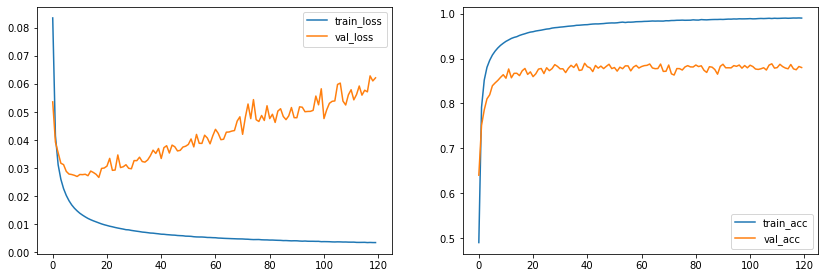

In [7]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(100, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Vergleich mehrerer Aktivierungsfunktionen - relu

Epoch 1/100
680/680 [==============================] - 10s 13ms/step - loss: 0.0665 - accuracy: 0.5920 - val_loss: 0.0472 - val_accuracy: 0.7105
Epoch 2/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0306 - accuracy: 0.8455 - val_loss: 0.0315 - val_accuracy: 0.8201
Epoch 3/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0213 - accuracy: 0.8950 - val_loss: 0.0329 - val_accuracy: 0.8024
Epoch 4/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0163 - accuracy: 0.9222 - val_loss: 0.0306 - val_accuracy: 0.8068
Epoch 5/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0131 - accuracy: 0.9393 - val_loss: 0.0285 - val_accuracy: 0.8640
Epoch 6/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0110 - accuracy: 0.9509 - val_loss: 0.0274 - val_accuracy: 0.8627
Epoch 7/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0094 - accuracy: 0.9592 - val_loss: 0.0349 - val_accuracy

680/680 [==============================] - 8s 11ms/step - loss: 0.0011 - accuracy: 0.9982 - val_loss: 0.0725 - val_accuracy: 0.8987
Epoch 58/100
680/680 [==============================] - 8s 11ms/step - loss: 0.0012 - accuracy: 0.9985 - val_loss: 0.0855 - val_accuracy: 0.8852
Epoch 59/100
680/680 [==============================] - 8s 11ms/step - loss: 0.0012 - accuracy: 0.9985 - val_loss: 0.0673 - val_accuracy: 0.9046
Epoch 60/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0011 - accuracy: 0.9987 - val_loss: 0.0692 - val_accuracy: 0.8996
Epoch 61/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0010 - accuracy: 0.9988 - val_loss: 0.0711 - val_accuracy: 0.9032
Epoch 62/100
680/680 [==============================] - 8s 11ms/step - loss: 0.0011 - accuracy: 0.9985 - val_loss: 0.0708 - val_accuracy: 0.9042
Epoch 63/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0012 - accuracy: 0.9985 - val_loss: 0.0787 - val_accuracy: 0.901

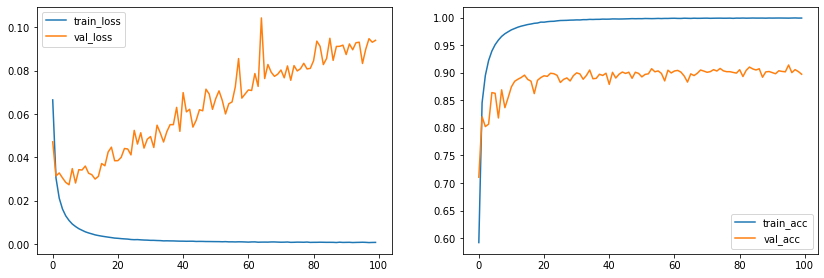

In [6]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(600, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Vergleich mehrerer Aktivierungsfunktionen - Sigmoid

Dense=600, Act.=sigmoid, optimizer=rmsprop, epochs=200

Epoch 1/100
680/680 [==============================] - 11s 13ms/step - loss: 0.0682 - accuracy: 0.5386 - val_loss: 0.0482 - val_accuracy: 0.6797
Epoch 2/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0380 - accuracy: 0.8045 - val_loss: 0.0379 - val_accuracy: 0.7682
Epoch 3/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0296 - accuracy: 0.8578 - val_loss: 0.0338 - val_accuracy: 0.7790
Epoch 4/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0244 - accuracy: 0.8876 - val_loss: 0.0325 - val_accuracy: 0.7994
Epoch 5/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0205 - accuracy: 0.9069 - val_loss: 0.0281 - val_accuracy: 0.8327
Epoch 6/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0175 - accuracy: 0.9222 - val_loss: 0.0292 - val_accuracy: 0.8349
Epoch 7/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0151 - accuracy: 0.9343 - val_loss: 0.0259 - val_accuracy

680/680 [==============================] - 8s 12ms/step - loss: 3.7889e-04 - accuracy: 0.9996 - val_loss: 0.0339 - val_accuracy: 0.8930
Epoch 58/100
680/680 [==============================] - 8s 12ms/step - loss: 3.8313e-04 - accuracy: 0.9994 - val_loss: 0.0323 - val_accuracy: 0.8989
Epoch 59/100
680/680 [==============================] - 8s 12ms/step - loss: 3.4857e-04 - accuracy: 0.9996 - val_loss: 0.0343 - val_accuracy: 0.8960
Epoch 60/100
680/680 [==============================] - 8s 12ms/step - loss: 3.2827e-04 - accuracy: 0.9996 - val_loss: 0.0354 - val_accuracy: 0.8980
Epoch 61/100
680/680 [==============================] - 8s 12ms/step - loss: 3.2641e-04 - accuracy: 0.9995 - val_loss: 0.0351 - val_accuracy: 0.8970
Epoch 62/100
680/680 [==============================] - 8s 12ms/step - loss: 3.2311e-04 - accuracy: 0.9995 - val_loss: 0.0331 - val_accuracy: 0.8972
Epoch 63/100
680/680 [==============================] - 8s 12ms/step - loss: 3.0269e-04 - accuracy: 0.9997 - val_loss: 

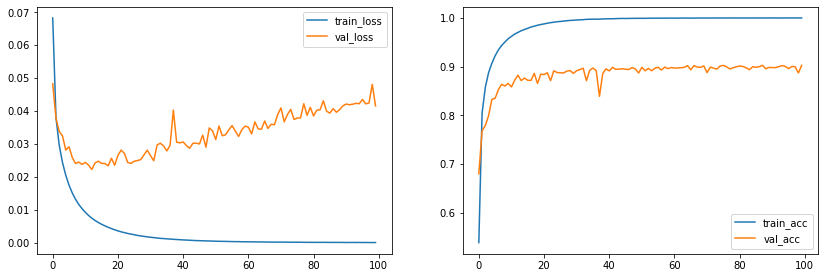

In [7]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(600, activation ='sigmoid', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# New Optimizer Adam
Activation=relu, optimizer=adamn, dense=86, epochs=120, batchsize=200

Epoch 1/120
680/680 [==============================] - 4s 5ms/step - loss: 0.1039 - accuracy: 0.3554 - val_loss: 0.0688 - val_accuracy: 0.5539
Epoch 2/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0556 - accuracy: 0.7094 - val_loss: 0.0477 - val_accuracy: 0.7155
Epoch 3/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0406 - accuracy: 0.8083 - val_loss: 0.0393 - val_accuracy: 0.7724
Epoch 4/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0337 - accuracy: 0.8437 - val_loss: 0.0352 - val_accuracy: 0.7956
Epoch 5/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0297 - accuracy: 0.8635 - val_loss: 0.0321 - val_accuracy: 0.8276
Epoch 6/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0268 - accuracy: 0.8790 - val_loss: 0.0306 - val_accuracy: 0.8369
Epoch 7/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0248 - accuracy: 0.8893 - val_loss: 0.0295 - val_accuracy: 0.8421

Epoch 58/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0088 - accuracy: 0.9650 - val_loss: 0.0311 - val_accuracy: 0.8749
Epoch 59/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0087 - accuracy: 0.9653 - val_loss: 0.0309 - val_accuracy: 0.8752
Epoch 60/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0085 - accuracy: 0.9656 - val_loss: 0.0310 - val_accuracy: 0.8691
Epoch 61/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0085 - accuracy: 0.9663 - val_loss: 0.0316 - val_accuracy: 0.8741
Epoch 62/120
680/680 [==============================] - 3s 5ms/step - loss: 0.0085 - accuracy: 0.9669 - val_loss: 0.0299 - val_accuracy: 0.8802
Epoch 63/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0084 - accuracy: 0.9670 - val_loss: 0.0314 - val_accuracy: 0.8729
Epoch 64/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0083 - accuracy: 0.9672 - val_loss: 0.0315 - val_accuracy:

Epoch 115/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0062 - accuracy: 0.9769 - val_loss: 0.0362 - val_accuracy: 0.8759
Epoch 116/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0062 - accuracy: 0.9771 - val_loss: 0.0378 - val_accuracy: 0.8772
Epoch 117/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0061 - accuracy: 0.9774 - val_loss: 0.0380 - val_accuracy: 0.8731
Epoch 118/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0061 - accuracy: 0.9780 - val_loss: 0.0372 - val_accuracy: 0.8728
Epoch 119/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0061 - accuracy: 0.9780 - val_loss: 0.0371 - val_accuracy: 0.8737
Epoch 120/120
680/680 [==============================] - 3s 4ms/step - loss: 0.0060 - accuracy: 0.9778 - val_loss: 0.0365 - val_accuracy: 0.8769


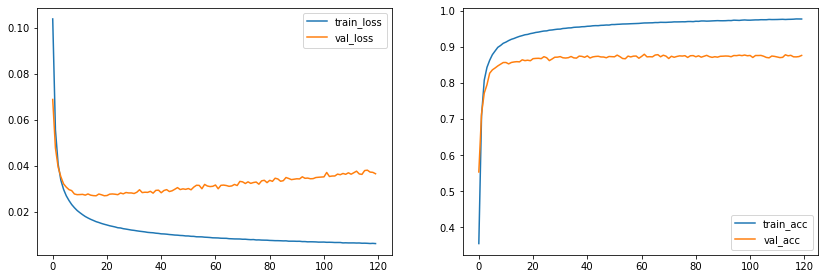

In [8]:
# New Optimizer Adam

# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Optimizer Adam - Dense 800, Epochs 100, Batchsize 120

680/680 [==============================] - 8s 12ms/step - loss: 0.0022 - accuracy: 0.9942 - val_loss: 0.0310 - val_accuracy: 0.8907
Epoch 20/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0021 - accuracy: 0.9949 - val_loss: 0.0282 - val_accuracy: 0.8975
Epoch 21/100
680/680 [==============================] - 8s 11ms/step - loss: 0.0019 - accuracy: 0.9955 - val_loss: 0.0293 - val_accuracy: 0.9009
Epoch 22/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0017 - accuracy: 0.9960 - val_loss: 0.0300 - val_accuracy: 0.9006
Epoch 23/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0015 - accuracy: 0.9967 - val_loss: 0.0301 - val_accuracy: 0.8998
Epoch 24/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0016 - accuracy: 0.9967 - val_loss: 0.0328 - val_accuracy: 0.8944
Epoch 25/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0014 - accuracy: 0.9971 - val_loss: 0.0321 - val_accuracy: 0.902

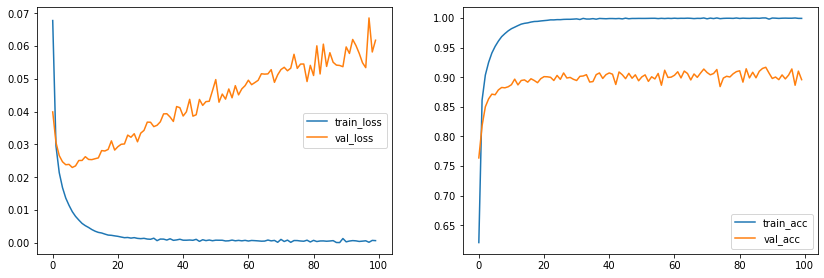

In [15]:
# New Optimizer Adam but Epoch and Batchsize lower

# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(800, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Dropout vs no Dropout

Standardnetz Activasion=relu, optimizer=rmsprop, Dense=600, epochs=100, batchsize=128

Epoch 1/100
680/680 [==============================] - 8s 10ms/step - loss: 0.0716 - accuracy: 0.5973 - val_loss: 0.0430 - val_accuracy: 0.7419
Epoch 2/100
680/680 [==============================] - 6s 9ms/step - loss: 0.0315 - accuracy: 0.8537 - val_loss: 0.0314 - val_accuracy: 0.8158
Epoch 3/100
680/680 [==============================] - 6s 9ms/step - loss: 0.0229 - accuracy: 0.8973 - val_loss: 0.0272 - val_accuracy: 0.8517
Epoch 4/100
680/680 [==============================] - 6s 9ms/step - loss: 0.0182 - accuracy: 0.9195 - val_loss: 0.0262 - val_accuracy: 0.8580
Epoch 5/100
680/680 [==============================] - 6s 9ms/step - loss: 0.0150 - accuracy: 0.9342 - val_loss: 0.0257 - val_accuracy: 0.8557
Epoch 6/100
680/680 [==============================] - 6s 9ms/step - loss: 0.0126 - accuracy: 0.9468 - val_loss: 0.0248 - val_accuracy: 0.8676
Epoch 7/100
680/680 [==============================] - 6s 9ms/step - loss: 0.0107 - accuracy: 0.9553 - val_loss: 0.0245 - val_accuracy: 0.875

680/680 [==============================] - 6s 9ms/step - loss: 5.8272e-04 - accuracy: 0.9994 - val_loss: 0.0460 - val_accuracy: 0.9023
Epoch 58/100
680/680 [==============================] - 6s 9ms/step - loss: 6.4765e-04 - accuracy: 0.9993 - val_loss: 0.0483 - val_accuracy: 0.8987
Epoch 59/100
680/680 [==============================] - 6s 9ms/step - loss: 3.8024e-04 - accuracy: 0.9996 - val_loss: 0.0488 - val_accuracy: 0.8976
Epoch 60/100
680/680 [==============================] - 6s 9ms/step - loss: 9.2415e-04 - accuracy: 0.9988 - val_loss: 0.0447 - val_accuracy: 0.9022
Epoch 61/100
680/680 [==============================] - 6s 9ms/step - loss: 5.6045e-04 - accuracy: 0.9992 - val_loss: 0.0487 - val_accuracy: 0.9014
Epoch 62/100
680/680 [==============================] - 6s 9ms/step - loss: 5.7833e-04 - accuracy: 0.9993 - val_loss: 0.0495 - val_accuracy: 0.9029
Epoch 63/100
680/680 [==============================] - 6s 9ms/step - loss: 4.9231e-04 - accuracy: 0.9995 - val_loss: 0.0548 

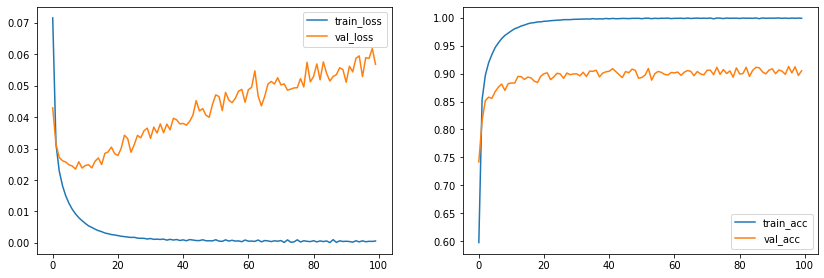

In [11]:
# Definition Topologie des Netzes
three_layer_mlp_no_dropout = Sequential()
three_layer_mlp_no_dropout.add(Dense(600, activation ='relu', input_dim=1024))
three_layer_mlp_no_dropout.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_no_dropout.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_no_dropout_history = three_layer_mlp_no_dropout.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_no_dropout_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_no_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_no_dropout_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### nun mit Dropout: Dropout = 0.5

Epoch 1/100
680/680 [==============================] - 8s 10ms/step - loss: 0.0829 - accuracy: 0.4483 - val_loss: 0.0453 - val_accuracy: 0.7192
Epoch 2/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0407 - accuracy: 0.7656 - val_loss: 0.0339 - val_accuracy: 0.8089
Epoch 3/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0318 - accuracy: 0.8256 - val_loss: 0.0290 - val_accuracy: 0.8424
Epoch 4/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0270 - accuracy: 0.8573 - val_loss: 0.0256 - val_accuracy: 0.8590
Epoch 5/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0240 - accuracy: 0.8753 - val_loss: 0.0249 - val_accuracy: 0.8628
Epoch 6/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0217 - accuracy: 0.8886 - val_loss: 0.0247 - val_accuracy: 0.8722
Epoch 7/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0203 - accuracy: 0.8967 - val_loss: 0.0235 - val_accuracy:

680/680 [==============================] - 8s 11ms/step - loss: 0.0084 - accuracy: 0.9659 - val_loss: 0.0287 - val_accuracy: 0.9217
Epoch 58/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0084 - accuracy: 0.9656 - val_loss: 0.0304 - val_accuracy: 0.9167
Epoch 59/100
680/680 [==============================] - 8s 11ms/step - loss: 0.0084 - accuracy: 0.9656 - val_loss: 0.0310 - val_accuracy: 0.9163
Epoch 60/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0082 - accuracy: 0.9673 - val_loss: 0.0293 - val_accuracy: 0.9240
Epoch 61/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0080 - accuracy: 0.9676 - val_loss: 0.0325 - val_accuracy: 0.9167
Epoch 62/100
680/680 [==============================] - 8s 11ms/step - loss: 0.0083 - accuracy: 0.9673 - val_loss: 0.0301 - val_accuracy: 0.9179
Epoch 63/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0083 - accuracy: 0.9670 - val_loss: 0.0298 - val_accuracy: 0.925

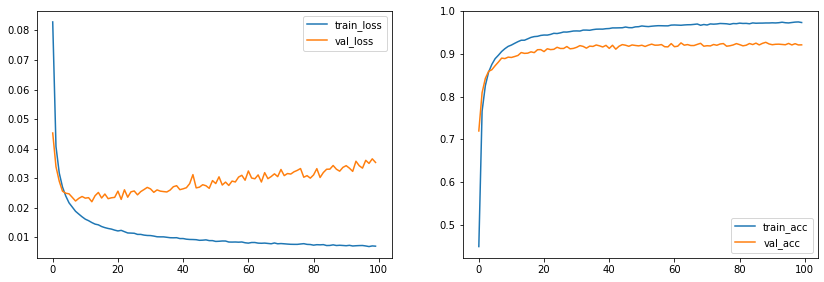

In [12]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_50 = Sequential()
three_layer_mlp_dropout_50.add(Dense(600, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_50.add(Dropout(0.5))
three_layer_mlp_dropout_50.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_50.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_50_history = three_layer_mlp_dropout_50.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_50_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_50_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_50_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_50_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Dropout von 0.3

Epoch 1/100
680/680 [==============================] - 9s 12ms/step - loss: 0.0757 - accuracy: 0.5207 - val_loss: 0.0427 - val_accuracy: 0.7358
Epoch 2/100
680/680 [==============================] - 8s 11ms/step - loss: 0.0349 - accuracy: 0.8142 - val_loss: 0.0311 - val_accuracy: 0.8192
Epoch 3/100
680/680 [==============================] - 7s 11ms/step - loss: 0.0264 - accuracy: 0.8667 - val_loss: 0.0264 - val_accuracy: 0.8518
Epoch 4/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0218 - accuracy: 0.8924 - val_loss: 0.0246 - val_accuracy: 0.8625
Epoch 5/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0188 - accuracy: 0.9095 - val_loss: 0.0234 - val_accuracy: 0.8754
Epoch 6/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0164 - accuracy: 0.9211 - val_loss: 0.0223 - val_accuracy: 0.8790
Epoch 7/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0148 - accuracy: 0.9298 - val_loss: 0.0228 - val_accuracy:

680/680 [==============================] - 7s 10ms/step - loss: 0.0038 - accuracy: 0.9878 - val_loss: 0.0325 - val_accuracy: 0.9187
Epoch 58/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0038 - accuracy: 0.9890 - val_loss: 0.0317 - val_accuracy: 0.9205
Epoch 59/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0038 - accuracy: 0.9884 - val_loss: 0.0322 - val_accuracy: 0.9207
Epoch 60/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0039 - accuracy: 0.9883 - val_loss: 0.0307 - val_accuracy: 0.9215
Epoch 61/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0039 - accuracy: 0.9887 - val_loss: 0.0330 - val_accuracy: 0.9144
Epoch 62/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0037 - accuracy: 0.9893 - val_loss: 0.0315 - val_accuracy: 0.9229
Epoch 63/100
680/680 [==============================] - 7s 10ms/step - loss: 0.0037 - accuracy: 0.9887 - val_loss: 0.0346 - val_accuracy: 0.907

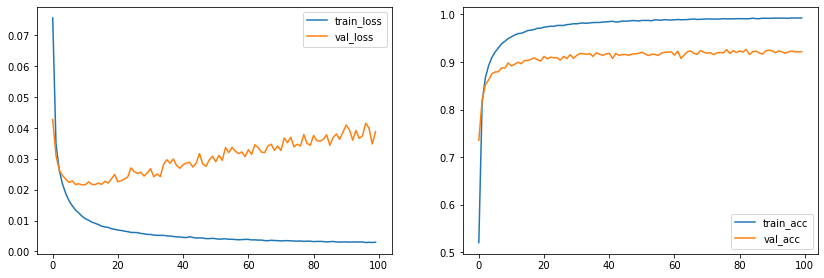

In [13]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(600, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Dropout von 0,1

Epoch 1/100
680/680 [==============================] - 11s 14ms/step - loss: 0.0675 - accuracy: 0.5879 - val_loss: 0.0443 - val_accuracy: 0.7008
Epoch 2/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0316 - accuracy: 0.8373 - val_loss: 0.0375 - val_accuracy: 0.7581
Epoch 3/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0224 - accuracy: 0.8868 - val_loss: 0.0289 - val_accuracy: 0.8300
Epoch 4/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0175 - accuracy: 0.9152 - val_loss: 0.0291 - val_accuracy: 0.8307
Epoch 5/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0144 - accuracy: 0.9321 - val_loss: 0.0317 - val_accuracy: 0.8409
Epoch 6/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0124 - accuracy: 0.9434 - val_loss: 0.0261 - val_accuracy: 0.8653
Epoch 7/100
680/680 [==============================] - 11s 16ms/step - loss: 0.0108 - accuracy: 0.9513 - val_loss: 0.0250 - val_accurac

680/680 [==============================] - 9s 13ms/step - loss: 0.0023 - accuracy: 0.9952 - val_loss: 0.0566 - val_accuracy: 0.9059
Epoch 58/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0024 - accuracy: 0.9953 - val_loss: 0.0651 - val_accuracy: 0.9011
Epoch 59/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0022 - accuracy: 0.9955 - val_loss: 0.0631 - val_accuracy: 0.8949
Epoch 60/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0023 - accuracy: 0.9958 - val_loss: 0.0672 - val_accuracy: 0.9026
Epoch 61/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0022 - accuracy: 0.9957 - val_loss: 0.0571 - val_accuracy: 0.9138
Epoch 62/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0022 - accuracy: 0.9958 - val_loss: 0.0660 - val_accuracy: 0.9099
Epoch 63/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0022 - accuracy: 0.9959 - val_loss: 0.0657 - val_accuracy: 0.905

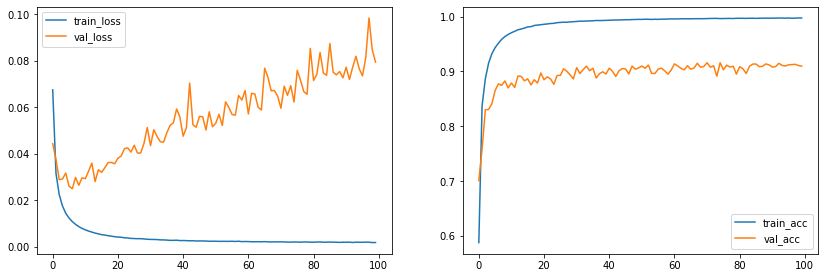

In [14]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_10 = Sequential()
three_layer_mlp_dropout_10.add(Dense(600, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_10.add(Dropout(0.1))
three_layer_mlp_dropout_10.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_10.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_10_history = three_layer_mlp_dropout_10.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_10_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_10_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_10_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_10_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Dropout 0,3 beste val_acc: 0,9219 -> Epochs und Dense verändern

Epoch 1/100
680/680 [==============================] - 6s 8ms/step - loss: 0.0917 - accuracy: 0.3878 - val_loss: 0.0516 - val_accuracy: 0.6916
Epoch 2/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0449 - accuracy: 0.7415 - val_loss: 0.0355 - val_accuracy: 0.8050
Epoch 3/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0342 - accuracy: 0.8148 - val_loss: 0.0307 - val_accuracy: 0.8349
Epoch 4/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0290 - accuracy: 0.8489 - val_loss: 0.0271 - val_accuracy: 0.8534
Epoch 5/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0256 - accuracy: 0.8682 - val_loss: 0.0258 - val_accuracy: 0.8615
Epoch 6/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0230 - accuracy: 0.8816 - val_loss: 0.0263 - val_accuracy: 0.8652
Epoch 7/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0213 - accuracy: 0.8921 - val_loss: 0.0240 - val_accuracy: 0.8741

Epoch 58/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0086 - accuracy: 0.9645 - val_loss: 0.0289 - val_accuracy: 0.9054
Epoch 59/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0085 - accuracy: 0.9651 - val_loss: 0.0269 - val_accuracy: 0.9132
Epoch 60/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0085 - accuracy: 0.9650 - val_loss: 0.0277 - val_accuracy: 0.9097
Epoch 61/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0085 - accuracy: 0.9654 - val_loss: 0.0274 - val_accuracy: 0.9132
Epoch 62/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0084 - accuracy: 0.9659 - val_loss: 0.0277 - val_accuracy: 0.9143
Epoch 63/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0083 - accuracy: 0.9675 - val_loss: 0.0281 - val_accuracy: 0.9134
Epoch 64/100
680/680 [==============================] - 5s 7ms/step - loss: 0.0083 - accuracy: 0.9663 - val_loss: 0.0279 - val_accuracy:

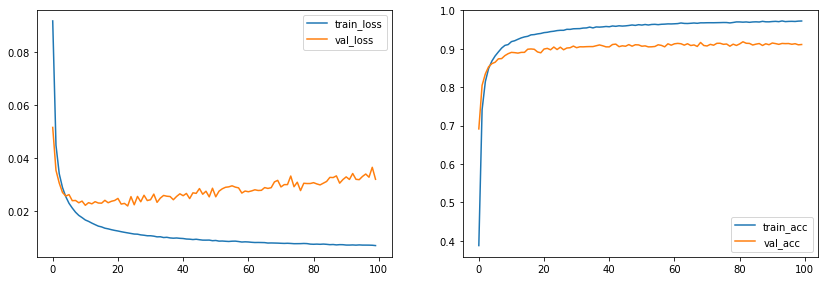

In [15]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(300, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0743 - accuracy: 0.5350 - val_loss: 0.0406 - val_accuracy: 0.7550
Epoch 2/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0336 - accuracy: 0.8264 - val_loss: 0.0306 - val_accuracy: 0.8154
Epoch 3/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0252 - accuracy: 0.8735 - val_loss: 0.0257 - val_accuracy: 0.8526
Epoch 4/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0206 - accuracy: 0.8992 - val_loss: 0.0264 - val_accuracy: 0.8452
Epoch 5/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0174 - accuracy: 0.9158 - val_loss: 0.0235 - val_accuracy: 0.8755
Epoch 6/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0154 - accuracy: 0.9273 - val_loss: 0.0235 - val_accuracy: 0.8783
Epoch 7/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0137 - accuracy: 0.9372 - val_loss: 0.0219 - val_accuracy:

680/680 [==============================] - 8s 12ms/step - loss: 0.0033 - accuracy: 0.9904 - val_loss: 0.0323 - val_accuracy: 0.9143
Epoch 58/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0032 - accuracy: 0.9911 - val_loss: 0.0326 - val_accuracy: 0.9187
Epoch 59/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0032 - accuracy: 0.9908 - val_loss: 0.0341 - val_accuracy: 0.9226
Epoch 60/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0032 - accuracy: 0.9909 - val_loss: 0.0322 - val_accuracy: 0.9200
Epoch 61/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0032 - accuracy: 0.9917 - val_loss: 0.0356 - val_accuracy: 0.9173
Epoch 62/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0030 - accuracy: 0.9920 - val_loss: 0.0370 - val_accuracy: 0.9167
Epoch 63/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0031 - accuracy: 0.9915 - val_loss: 0.0366 - val_accuracy: 0.917

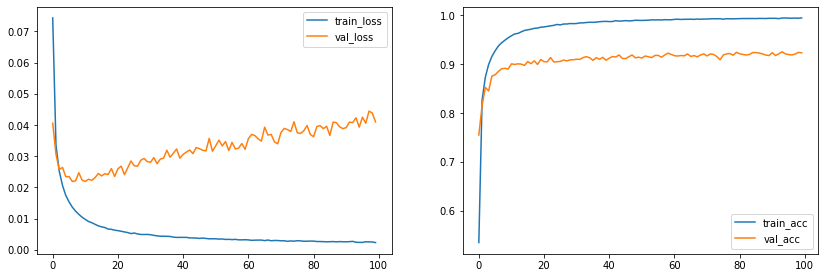

In [16]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(800, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### dense 800 kleiner teil besser, vllt epochs erhöhen

Epoch 1/120
680/680 [==============================] - 9s 13ms/step - loss: 0.0721 - accuracy: 0.5512 - val_loss: 0.0403 - val_accuracy: 0.7607
Epoch 2/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0327 - accuracy: 0.8308 - val_loss: 0.0295 - val_accuracy: 0.8291
Epoch 3/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0246 - accuracy: 0.8770 - val_loss: 0.0256 - val_accuracy: 0.8566
Epoch 4/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0202 - accuracy: 0.9021 - val_loss: 0.0236 - val_accuracy: 0.8641
Epoch 5/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0172 - accuracy: 0.9183 - val_loss: 0.0236 - val_accuracy: 0.8708
Epoch 6/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0150 - accuracy: 0.9299 - val_loss: 0.0237 - val_accuracy: 0.8774
Epoch 7/120
680/680 [==============================] - 9s 12ms/step - loss: 0.0132 - accuracy: 0.9394 - val_loss: 0.0219 - val_accuracy:

680/680 [==============================] - 8s 12ms/step - loss: 0.0031 - accuracy: 0.9911 - val_loss: 0.0330 - val_accuracy: 0.9200
Epoch 58/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0031 - accuracy: 0.9915 - val_loss: 0.0327 - val_accuracy: 0.9201
Epoch 59/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0030 - accuracy: 0.9918 - val_loss: 0.0358 - val_accuracy: 0.9145
Epoch 60/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0030 - accuracy: 0.9917 - val_loss: 0.0342 - val_accuracy: 0.9161
Epoch 61/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0031 - accuracy: 0.9919 - val_loss: 0.0353 - val_accuracy: 0.9165
Epoch 62/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0028 - accuracy: 0.9924 - val_loss: 0.0368 - val_accuracy: 0.9171
Epoch 63/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0030 - accuracy: 0.9918 - val_loss: 0.0368 - val_accuracy: 0.916

680/680 [==============================] - 8s 12ms/step - loss: 0.0021 - accuracy: 0.9955 - val_loss: 0.0459 - val_accuracy: 0.9172
Epoch 114/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0022 - accuracy: 0.9954 - val_loss: 0.0475 - val_accuracy: 0.9193
Epoch 115/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0022 - accuracy: 0.9948 - val_loss: 0.0444 - val_accuracy: 0.9215
Epoch 116/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0021 - accuracy: 0.9955 - val_loss: 0.0449 - val_accuracy: 0.9246
Epoch 117/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0022 - accuracy: 0.9950 - val_loss: 0.0462 - val_accuracy: 0.9226
Epoch 118/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0021 - accuracy: 0.9956 - val_loss: 0.0476 - val_accuracy: 0.9210
Epoch 119/120
680/680 [==============================] - 8s 12ms/step - loss: 0.0021 - accuracy: 0.9955 - val_loss: 0.0443 - val_accuracy:

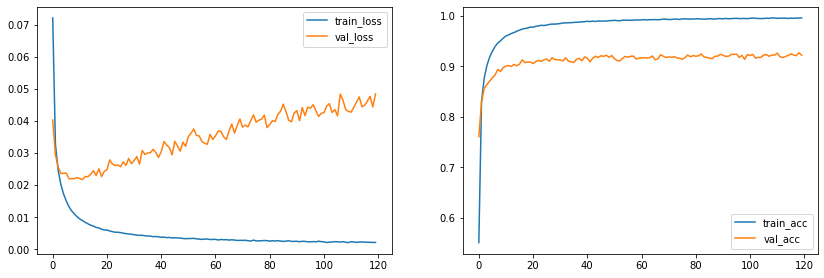

In [17]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(800, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Kein besseres ergebnis, nun mit sigmoid aktivierungsfunktion

Epoch 1/100
680/680 [==============================] - 10s 13ms/step - loss: 0.0841 - accuracy: 0.3707 - val_loss: 0.0529 - val_accuracy: 0.6693
Epoch 2/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0441 - accuracy: 0.7522 - val_loss: 0.0380 - val_accuracy: 0.7666
Epoch 3/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0331 - accuracy: 0.8285 - val_loss: 0.0326 - val_accuracy: 0.7909
Epoch 4/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0271 - accuracy: 0.8647 - val_loss: 0.0280 - val_accuracy: 0.8342
Epoch 5/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0229 - accuracy: 0.8887 - val_loss: 0.0259 - val_accuracy: 0.8526
Epoch 6/100
680/680 [==============================] - 9s 13ms/step - loss: 0.0197 - accuracy: 0.9060 - val_loss: 0.0254 - val_accuracy: 0.8609
Epoch 7/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0172 - accuracy: 0.9197 - val_loss: 0.0225 - val_accuracy

680/680 [==============================] - 8s 12ms/step - loss: 0.0014 - accuracy: 0.9973 - val_loss: 0.0254 - val_accuracy: 0.9166
Epoch 58/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0013 - accuracy: 0.9976 - val_loss: 0.0265 - val_accuracy: 0.9187
Epoch 59/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0013 - accuracy: 0.9975 - val_loss: 0.0250 - val_accuracy: 0.9194
Epoch 60/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0013 - accuracy: 0.9978 - val_loss: 0.0255 - val_accuracy: 0.9180
Epoch 61/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0012 - accuracy: 0.9978 - val_loss: 0.0273 - val_accuracy: 0.9184
Epoch 62/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0013 - accuracy: 0.9975 - val_loss: 0.0262 - val_accuracy: 0.9150
Epoch 63/100
680/680 [==============================] - 8s 12ms/step - loss: 0.0012 - accuracy: 0.9978 - val_loss: 0.0277 - val_accuracy: 0.918

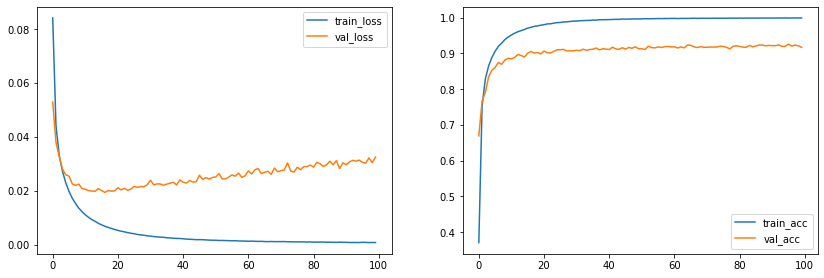

In [18]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(800, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])